In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.datasets import load_files
moviedir = '/content/drive/My Drive/Acamica/Entrega 5/dataset/movie_reviews' 
movie_reviews = load_files(moviedir, shuffle=True,encoding='utf-8',decode_error='ignore')

In [6]:
print("We have {} reviews, with classes {},".format(len(movie_reviews.data), movie_reviews.target_names))

We have 2000 reviews, with classes ['neg', 'pos'],


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    movie_reviews.data, movie_reviews.target, test_size = 0.20, stratify=movie_reviews.target, random_state = 12)

In [8]:
import nltk

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)
tfidf_matrix = vectorizer.fit_transform(X_train) 
print(tfidf_matrix.todense()[0])
print(vectorizer.vocabulary_)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.09435917 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.10803174 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.07938381 0.         0.         0.11322226 0.
  0.10119008 0.         0.13980189 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [10]:
Test_matrix = vectorizer.transform(X_test)

In [11]:
tfidf_matrix.shape

(1600, 1000)

In [ ]:
#Linear SVC

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C':[0.001, 0.01, 0.1, 1, 10],
            'loss': ['hinge','squared_hinge'] 
             }

In [13]:
from sklearn.svm import LinearSVC

clf= LinearSVC()

In [14]:
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score='True')

In [15]:
grid_search.fit(tfidf_matrix, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
             scoring=None, verbose=0)

In [19]:
grid_search.best_params_

{'C': 0.1, 'loss': 'squared_hinge'}

In [20]:
optimised_svm = grid_search.best_estimator_

In [21]:
import numpy as np
import itertools
import matplotlib.pylab as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Normalized confusion matrix
[[0.77 0.23]
 [0.18 0.81]]


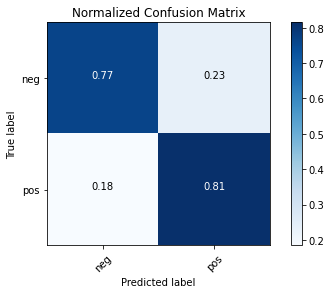

In [22]:
from sklearn.metrics import confusion_matrix

class_names = movie_reviews.target_names

y_pred = optimised_svm.predict(Test_matrix)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score (y_test, y_pred)
print(roc_auc)

0.7899999999999999


In [24]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.81      0.77      0.78       200
           1       0.78      0.81      0.80       200

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [ ]:
#Random Forest

In [25]:
param_grid = { 'n_estimators' : [100, 500, 1000],
              'max_depth' : [3, 7, None], 
              'min_samples_split' : [2, 3, 10],
              'bootstrap': [True, False],
              'criterion' : ["gini", "entropy"]
              }

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, return_train_score='True')

In [27]:
grid_search.fit(tfidf_matrix, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 3,
 'n_estimators': 500}

In [29]:
optimised_rnd_forest = grid_search.best_estimator_

Normalized confusion matrix
[[0.82 0.17]
 [0.18 0.82]]


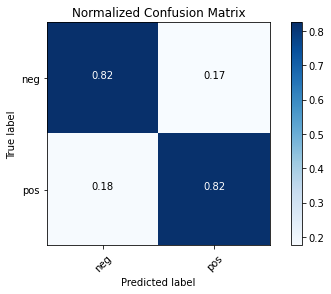

In [30]:
from sklearn.metrics import confusion_matrix

class_names = movie_reviews.target_names

y_pred = optimised_rnd_forest.predict(Test_matrix)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score (y_test, y_pred)
print(roc_auc)

0.8224999999999999


In [32]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       200
           1       0.82      0.82      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [ ]:
#Multilayer Perceptron

In [33]:
param_grid = { 'hidden_layer_sizes': [(10,),(5,5), (2,2)]
              }

In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

grid_search = GridSearchCV(clf, param_grid, cv = 5, return_train_score=True)

In [35]:
grid_search.fit(tfidf_matrix, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [36]:
grid_search.best_params_

{'hidden_layer_sizes': (10,)}

In [37]:
optimised_multilayer_p = grid_search.best_estimator_

Normalized confusion matrix
[[0.73 0.27]
 [0.21 0.79]]


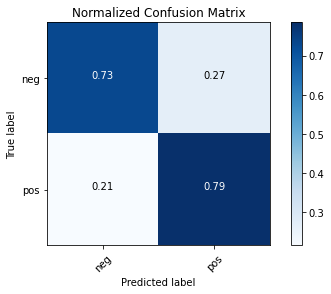

In [38]:
class_names = movie_reviews.target_names

y_pred = optimised_multilayer_p.predict(Test_matrix)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score (y_test, y_pred)
print(roc_auc)

0.7575000000000001


In [40]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       200
           1       0.74      0.79      0.76       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [ ]:
#Ada Boost

In [41]:
param_grid = { 'n_estimators': [50, 100, 500]
              }

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()

grid_search=GridSearchCV(ada_clf, param_grid, cv=5, return_train_score= True)

In [43]:
grid_search.fit(tfidf_matrix, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [44]:
grid_search.best_params_

{'n_estimators': 500}

In [45]:
optimised_ada = grid_search.best_estimator_

Normalized confusion matrix
[[0.71 0.28]
 [0.15 0.84]]


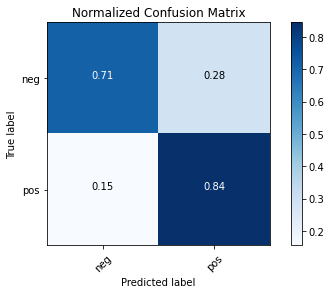

In [46]:
class_names = movie_reviews.target_names

y_pred = optimised_ada.predict(Test_matrix)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score (y_test, y_pred)
print(roc_auc)

0.7800000000000001


In [48]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       200
           1       0.75      0.84      0.79       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

voting_clf = VotingClassifier(
estimators=[('svc', optimised_svm), ('mlp', optimised_multilayer_p),('ada', optimised_ada),('rnd',optimised_rnd_forest)],voting='hard')


voting_clf

VotingClassifier(estimators=[('svc',
                              LinearSVC(C=0.1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('mlp',
                              MLPClassifier(activation='relu', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1...
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_featu

In [53]:
eclf = voting_clf
X_all = vectorizer.transform(movie_reviews.data)
y_all = movie_reviews.target
eclf.fit(X_all,y_all)

VotingClassifier(estimators=[('svc',
                              LinearSVC(C=0.1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('mlp',
                              MLPClassifier(activation='relu', alpha=0.0001,
                                            batch_size='auto', beta_1=0.9,
                                            beta_2=0.999, early_stopping=False,
                                            epsilon=1...
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_featu

In [54]:
# Saving the model
from sklearn.externals import joblib
joblib.dump(eclf, 'sentiment.pkl') 

['sentiment.pkl']

In [55]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
#Now we're going to test our classifier with Rocky 4 reviews

In [56]:
reviews_new = ["Stallone creates credible villains worthy of his heroic character.",
               "Another brilliant Rocky film, probably my favourite one out of the lot",
               "Yeah, this movie sucks.",
               "My favourite rocky film! So good so much heart. Slightly better than 2",
               "What has this got to do with boxing. Also everyone looked like dolls. Also if you are a real true boxing fan (not casuals), you would understand that this stupidity is no description of boxing!!",
               "The new film's narrative is stripped down to essentials, which gives it an emblematic quality.",
               "Absurdly ridiculous, this just isn't a good movie at all", 
               "Very basic and predictable but still an okay movie. No special music to save this one.", 
              "Rocky 4 is an extremely ambitious movie that is definitely worth watching.",
              'Highly beautiful',
               "If it wasn't for the robots (WTF????), and the painfully overwritten lines of an absurdly dogmatic persuasion, then this would otherwise be nothing more than an interminable series of mildly rousing montages. There are some unintentionally funny bits though, and Dolph's Ivan showcases the best and worst of all Rocky's opponents.",
              "While all aspects of realism is thrown out the window, ROCKY IV is an adrenaline rush of action and excitment, with an incredible soundtrack and arguably the best movie fight in history between Balboa and Drago",
              "Just like the songs, exercise routines and repetitive clips, it seems redundant to add another installment in this already falling franchise when you clearly lack material. Rocky IV is petty, childish and seems overlong despite of its 91 minutes of run time for it merely has an idea of a TV drama episode which is stretched to a point of exhaustion. Its painful to watch Sylvester Stallone go through this enormous amount of training and hardly make a point out there. He fails on all the levels here; writer, director and actor, to deliver any loose end of the thread for the audience to hang on to. Rocky IV is predictable, loosely written and choreographed and executed unsupervised."]
reviews_new_counts = vectorizer.transform(reviews_new)
reviews_new_tfidf = vectorizer.transform(reviews_new)

In [57]:
pred = eclf.predict(reviews_new_tfidf)

In [58]:
for review, category in zip(reviews_new, pred):
    print('%r => %s \n' % (review, movie_reviews.target_names[category]))

'Stallone creates credible villains worthy of his heroic character.' => pos 

'Another brilliant Rocky film, probably my favourite one out of the lot' => pos 

'Yeah, this movie sucks.' => neg 

'My favourite rocky film! So good so much heart. Slightly better than 2' => pos 

'What has this got to do with boxing. Also everyone looked like dolls. Also if you are a real true boxing fan (not casuals), you would understand that this stupidity is no description of boxing!!' => neg 

"The new film's narrative is stripped down to essentials, which gives it an emblematic quality." => pos 

"Absurdly ridiculous, this just isn't a good movie at all" => neg 

'Very basic and predictable but still an okay movie. No special music to save this one.' => neg 

'Rocky 4 is an extremely ambitious movie that is definitely worth watching.' => pos 

'Highly beautiful' => pos 

"If it wasn't for the robots (WTF????), and the painfully overwritten lines of an absurdly dogmatic persuasion, then this would oth